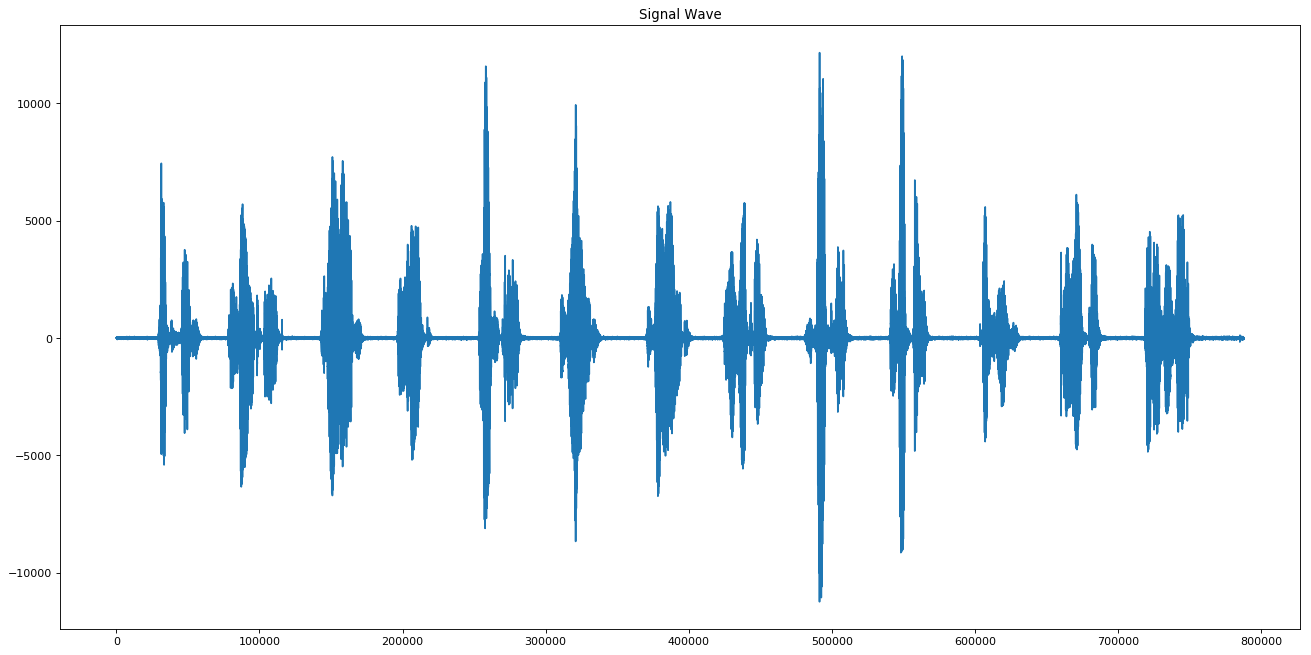

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import wave
import sys
import agh_util
import scipy.io.wavfile
import scipy.signal
import os

# Firstly, establish all necessary variables
path = 'sound_data'
words_structure = dict()

#Extract Raw Audio from Wav File (just make a reading function test)
#Expecting 44100 Hz sampling frequency
signal, fs = agh_util.get_signal_from_file('sound_data/273352_23_M_00_3.wav')

plt.figure(figsize=(20, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.title('Signal Wave')

plt.plot(signal)
plt.show()

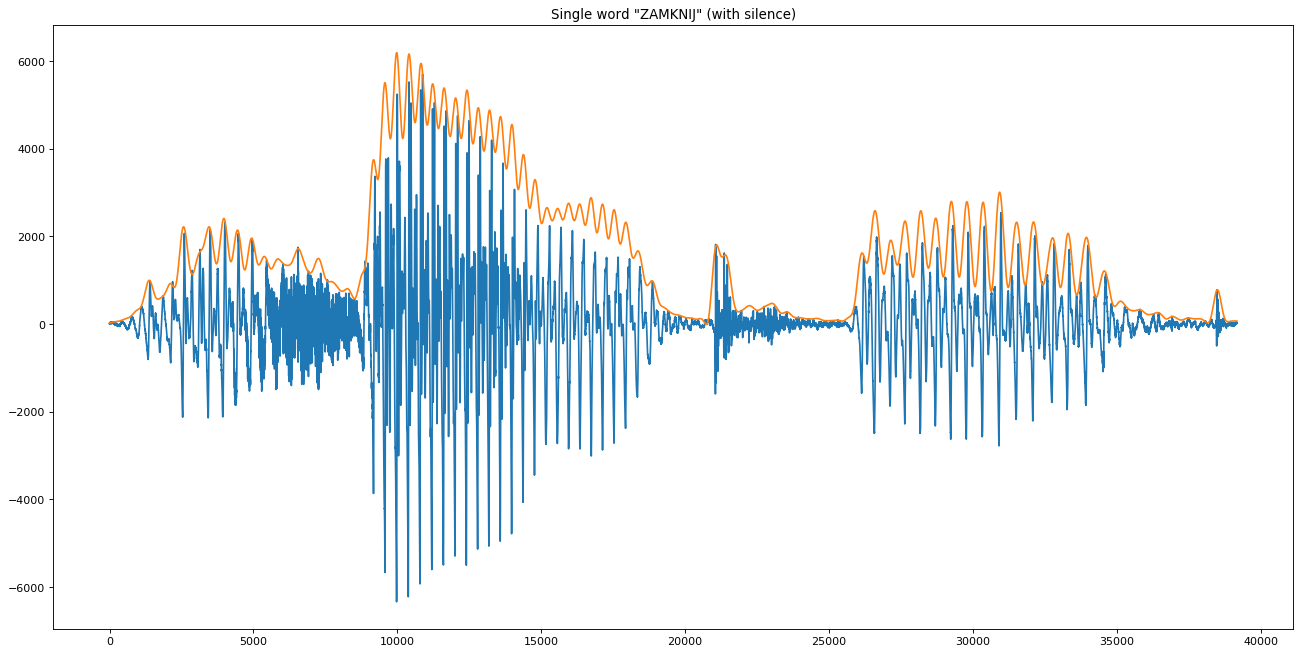

In [2]:
#Having the directory...
for filename in os.listdir(path):
    #...we extract all of the filenames with *.wav extension...
    if(filename.endswith('.wav')):
        #...Then we extract signalfrom files, one by one,
        words_signal, fs = agh_util.get_signal_from_file(path + '/' + filename)
        #use provided timestamps to localize words in signals,
        words_timestamps = agh_util.parse_timestamps(path + '/' + filename.replace('.wav', '.txt'))
        for word_info in words_timestamps:
            #initialize a list...
            if word_info[2] not in words_structure:
                words_structure[word_info[2]] = list()
            #... and put our words into it
            words_structure[word_info[2]].append(words_signal[int(word_info[0]*fs):int(word_info[1]*fs)])


single_word = words_structure['ZAMKNIJ'][0]
env = agh_util.get_envelope(single_word, interval_length = 220, f_s = fs, f_cut = 220)

plt.figure(figsize=(20, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.title('Single word "ZAMKNIJ" (with silence)')
plt.plot(single_word)
plt.plot(env)

plt.show()

# single_word = agh_util.cut_silence(single_word, silence_level = 0.015, envelope = env)
# env = agh_util.get_envelope(single_word, interval_length = 220, f_s = fs, f_cut = 220)
# plt.figure(figsize=(20, 10), dpi= 80, facecolor='w', edgecolor='k')
# plt.title('Single word "ZAMKNIJ" (silence cut out)')
# plt.plot(single_word)
# plt.plot(env)

# plt.show()

In [3]:
#Cut the silence out of every word.
for key in words_structure:
    a = list()
    for word in words_structure[key]:
        envel = agh_util.get_envelope(word, interval_length = 220, f_s = fs, f_cut = 220)
        word = agh_util.cut_silence(word, silence_level = 0.015, envelope = envel)
        a.append(word)
    words_structure[key] = a

for key in words_structure:
    print(len(words_structure[key]),'\t', key)

8 	 ZROB
8 	 TELEWIZOR
8 	 ROLETY
8 	 MUZYKE
8 	 WYLACZ
8 	 SWIATLO
8 	 NASTROJ
8 	 OTWORZ
8 	 GARAZ
8 	 ZAMKNIJ
8 	 WLACZ
8 	 ZAPAL
8 	 PODNIES


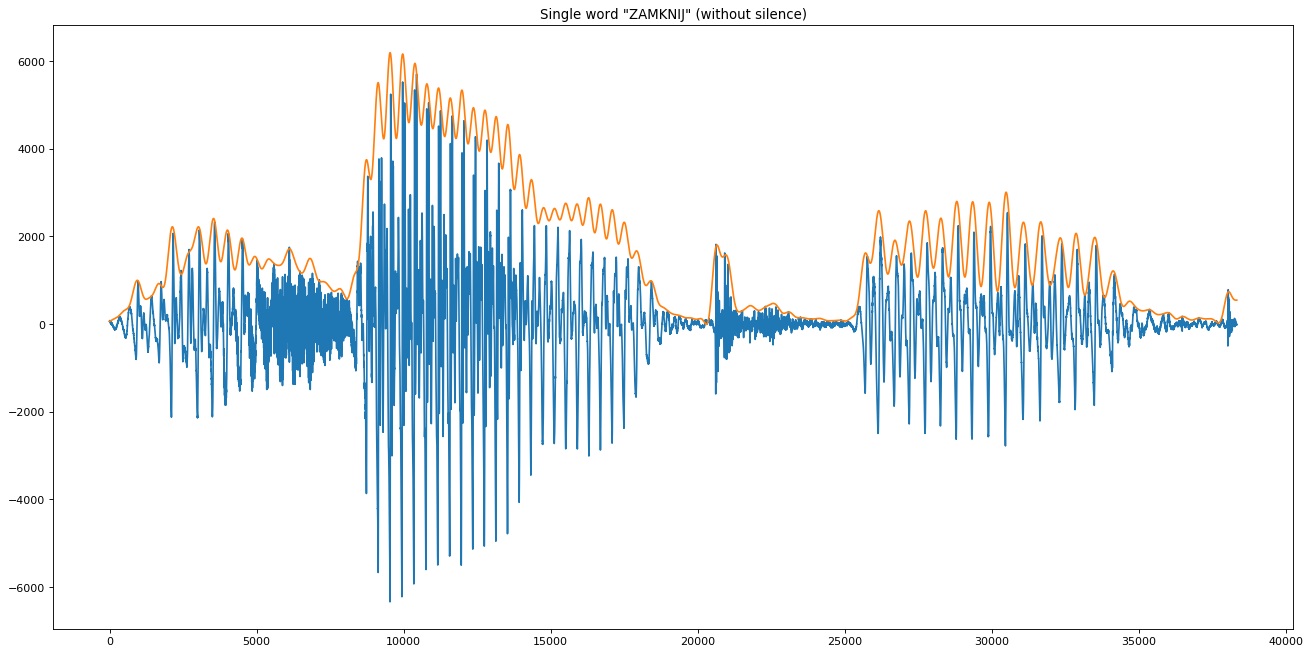

In [4]:
single_word = words_structure['ZAMKNIJ'][0]
env = agh_util.get_envelope(single_word, interval_length = 220, f_s = fs, f_cut = 220)
plt.figure(figsize=(20, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.title('Single word "ZAMKNIJ" (without silence)')
plt.plot(single_word)
plt.plot(env)